In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
from strategy import *

%matplotlib inline

bt version :  (0, 2, 10)


In [2]:
# 투자자산
tickers = ['TQQQ','TMF']
safe_ticker = ['BIL']

In [3]:
data = yf.download(tickers+safe_ticker, end='2022-12-10')['Adj Close']
data = data[tickers+safe_ticker]
for c in data.columns:
    print(c, data[c].first_valid_index())
assets = data.dropna().copy()
    
start_day = assets.index.min() + pd.DateOffset(months=12)
print('assets \n', assets)
print('start day : ', start_day)

[*********************100%***********************]  3 of 3 completed
TQQQ 2010-02-11 00:00:00
TMF 2009-04-16 00:00:00
BIL 2007-05-30 00:00:00
assets 
                  TQQQ        TMF        BIL
Date                                       
2010-02-11   0.429243   6.660957  86.303909
2010-02-12   0.431001   6.736331  86.303909
2010-02-16   0.447695   6.796630  86.303909
2010-02-17   0.455293   6.579123  86.247459
2010-02-18   0.463924   6.467136  86.285095
...               ...        ...        ...
2022-12-05  22.115219   9.182485  91.179413
2022-12-06  20.712500   9.540632  91.209328
2022-12-07  20.463791  10.177337  91.209328
2022-12-08  21.190022  10.107697  91.269150
2022-12-09  20.782137   9.331713  91.259178

[3231 rows x 3 columns]
start day :  2011-02-11 00:00:00


In [7]:
# 절대모멘텀 백테스트
def AbsoluteMomentum_BT1(assets, rank, months, start_day, run_on_end_of_period=False, lag=1, name='Absolute Momentum'):
    s = bt.Strategy(name, [bt.algos.RunAfterDate(start_day),
                           #bt.algos.RunMonthly(run_on_first_date=False, run_on_end_of_period=run_on_end_of_period, run_on_last_date=False),
                           bt.algos.RunQuarterly(run_on_first_date=False, run_on_end_of_period=run_on_end_of_period, run_on_last_date=False),
                           #bt.algos.PrintInfo('{name}:{now}. Value:{_value:0.0f}, Price:{_price:0.4f}'),
                           #bt.algos.PrintDate(),
                           SelectAbsoluteMomentum(rank=rank, lookback=pd.DateOffset(months=months), lag=pd.DateOffset(days=lag)),
                           bt.algos.WeighEqually(),
                           #bt.algos.PrintTempData(),
                           bt.algos.Rebalance()])
    return bt.Backtest(s, assets, initial_capital=100000000.0)

In [8]:
# 절대모멘텀 백테스트
def AbsoluteMomentum_BT2(assets, rank, months, start_day, run_on_end_of_period=False, lag=1, name='Absolute Momentum'):
    s = bt.Strategy(name, [bt.algos.RunAfterDate(start_day),
                           bt.algos.RunMonthly(run_on_first_date=False, run_on_end_of_period=run_on_end_of_period, run_on_last_date=False),
                           #bt.algos.RunQuarterly(run_on_first_date=False, run_on_end_of_period=run_on_end_of_period, run_on_last_date=False),
                           #bt.algos.PrintInfo('{name}:{now}. Value:{_value:0.0f}, Price:{_price:0.4f}'),
                           #bt.algos.PrintDate(),
                           SelectAbsoluteMomentum(rank=rank, lookback=pd.DateOffset(months=months), lag=pd.DateOffset(days=lag)),
                           bt.algos.WeighEqually(),
                           #bt.algos.PrintTempData(),
                           bt.algos.Rebalance()])
    return bt.Backtest(s, assets, initial_capital=100000000.0)

In [9]:
# 절대모멘텀 TQQQ (1~12개월 비교)
absolutemomentum = {}
for i in range(0, 12):   
    absolutemomentum[i] = AbsoluteMomentum_BT1(assets[tickers[0]].to_frame(), 1, i+1, start_day, False, 1, name='{}({})'.format(tickers[0],str(i+1)))
    
am_report = bt.run(*absolutemomentum.values())

Stat                 TQQQ(1)     TQQQ(2)     TQQQ(3)     TQQQ(4)     TQQQ(5)     TQQQ(6)     TQQQ(7)     TQQQ(8)     TQQQ(9)     TQQQ(10)    TQQQ(11)    TQQQ(12)
-------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11
End                  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         -40.48%     147.80%     240.27%     1686.20%    174.90%     338.07%     344.03%     349.47%     530.78%     189.66%     118.00%     103.24%
Daily Sharpe         0.12

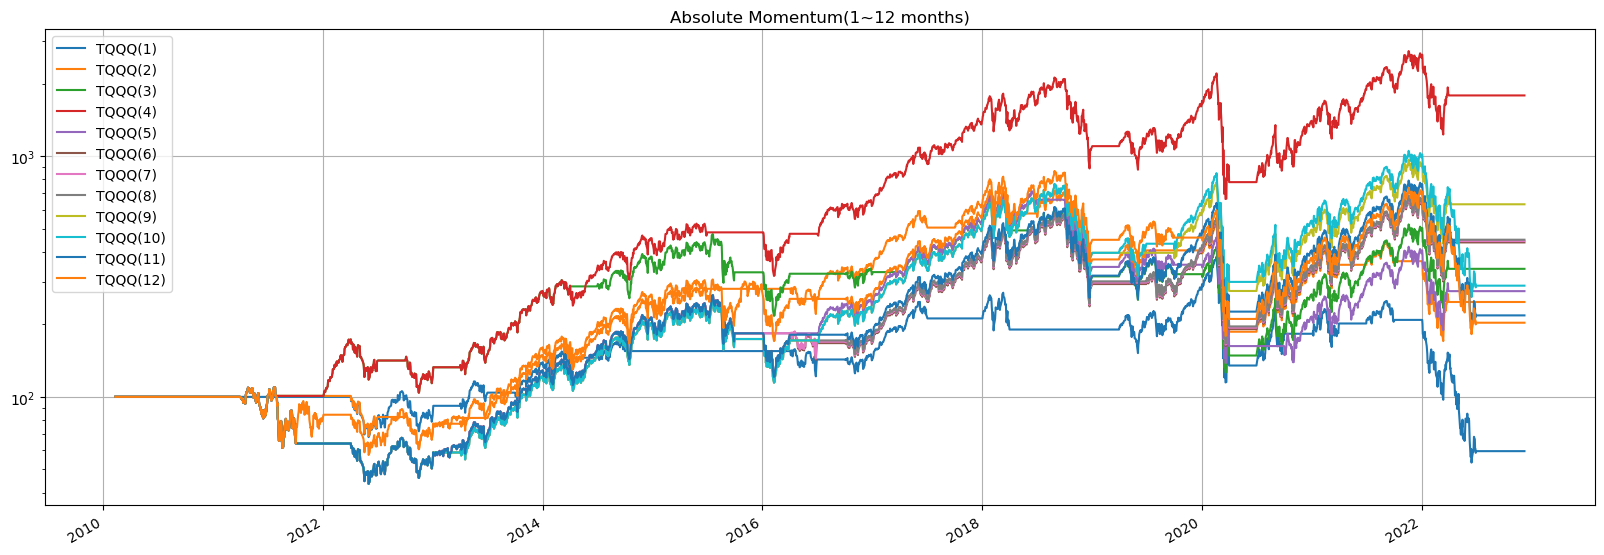

In [10]:
am_report.plot(figsize=(20,7), grid=True, logy=True, title='Absolute Momentum(1~12 months)')
am_report.set_date_range(start=start_day)
am_report.display()

In [11]:
# 절대모멘텀 상위 1종목 (1~12개월 비교)
absolutemomentum = {}
for i in range(0, 12):   
    absolutemomentum[i] = AbsoluteMomentum_BT2(assets[tickers], 1, i+1, start_day, False, 1, name='AM({})'.format(str(i+1)))
    
am1_report = bt.run(*absolutemomentum.values())

Stat                 AM(1)       AM(2)       AM(3)       AM(4)       AM(5)       AM(6)       AM(7)       AM(8)       AM(9)       AM(10)      AM(11)      AM(12)
-------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11
End                  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         362.81%     161.70%     458.03%     961.31%     615.91%     308.90%     229.57%     129.51%     436.13%     290.18%     198.17%     118.73%
Daily Sharpe         0.51  

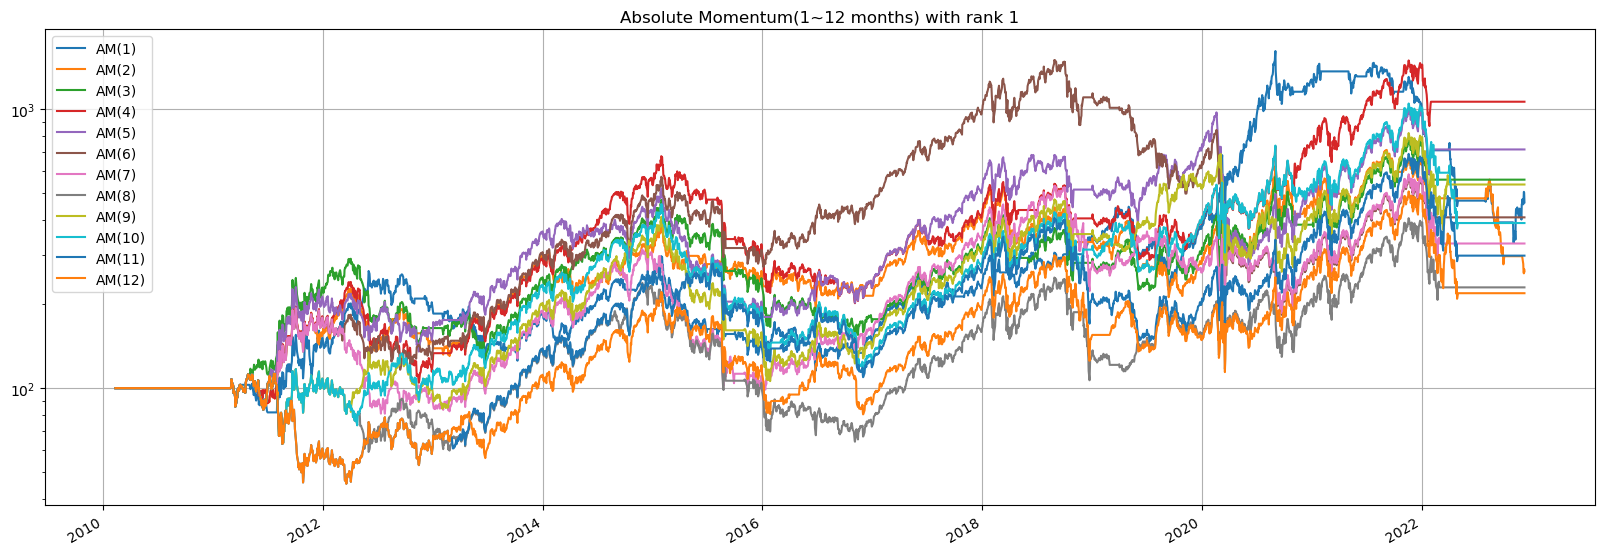

In [12]:
am1_report.plot(figsize=(20,7), grid=True, logy=True, title='Absolute Momentum(1~12 months) with rank 1')
am1_report.set_date_range(start=start_day)
am1_report.display()
#am1_report.prices[start_day:].calc_stats().display()


In [13]:
am1_report.get_transactions('AM(4)')

price     quantity
Date       Security                        
2011-03-01 TQQQ       0.857660  116596337.0
2011-06-01 TMF        8.993390   11093818.0
           TQQQ       0.855696 -116596337.0
2012-02-01 TMF       15.500235  -11093818.0
           TQQQ       0.913480  188243699.0
...                        ...          ...
2020-03-02 TMF       35.552830   11100834.0
           TQQQ      21.764540  -18133444.0
2020-07-01 TMF       38.365536  -11100834.0
           TQQQ      25.154446   16930981.0
2022-02-01 TQQQ      62.684658  -16930981.0

[65 rows x 2 columns]

In [14]:
# 절대모멘텀 상위 2종목 (1~12개월 비교)
absolutemomentum = {}
for i in range(0, 12):   
    absolutemomentum[i] = AbsoluteMomentum_BT2(assets[tickers], 2, i+1, start_day, False, 1, name='AM({})'.format(str(i+1)))
    
am2_report = bt.run(*absolutemomentum.values())

Stat                 AM(1)       AM(2)       AM(3)       AM(4)       AM(5)       AM(6)       AM(7)       AM(8)       AM(9)       AM(10)      AM(11)      AM(12)
-------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11
End                  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         200.14%     142.69%     423.27%     835.98%     1033.71%    2222.81%    1380.74%    1456.29%    867.39%     1307.03%    387.87%     339.21%
Daily Sharpe         0.43  

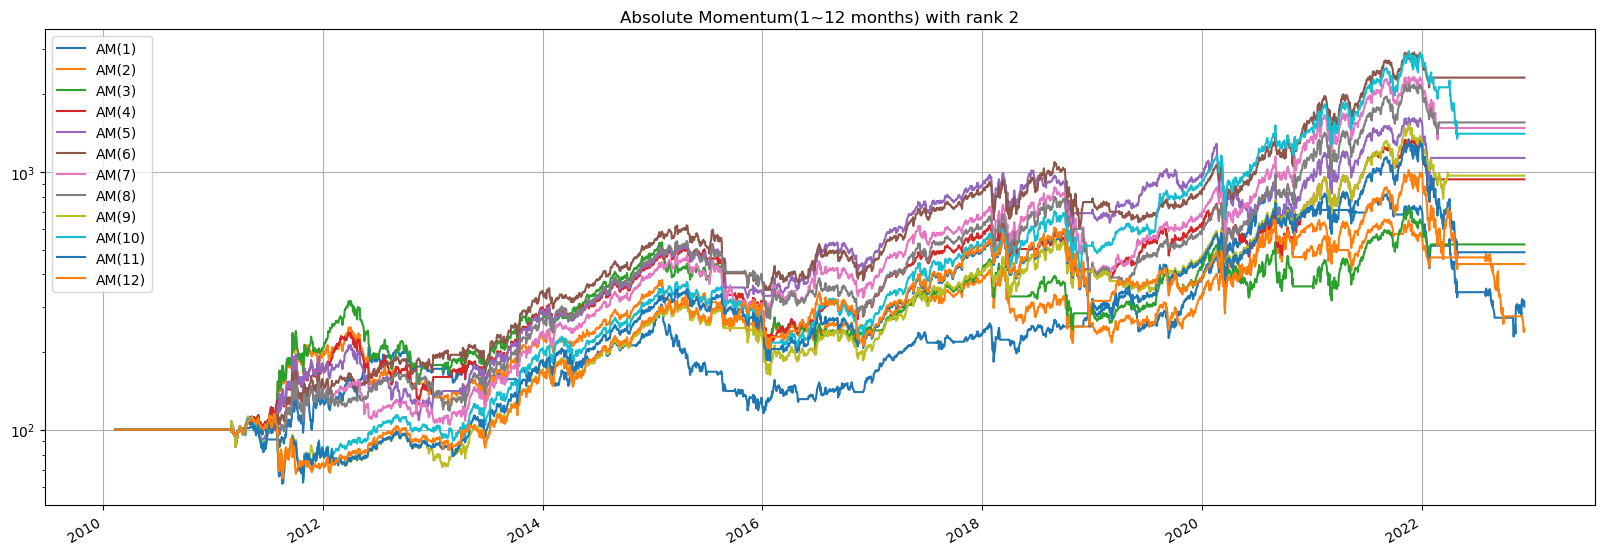

In [15]:
am2_report.plot(figsize=(20,7), grid=True, logy=True, title='Absolute Momentum(1~12 months) with rank 2')
am2_report.set_date_range(start=start_day)
am2_report.display()
#am1_report.prices[start_day:].calc_stats().display()